In [1]:
import pandas as pd
import numpy as np

import quantstats as qs
from tinycta.portfolio import Portfolio


In [2]:
# Load prices
prices = pd.read_csv("data/p_ob.csv", index_col=0, parse_dates=True).ffill().truncate(before="1970-01-01")

In [3]:
# take two moving averages and apply the sign-function, adjust by volatility
def f(price, fast=32, slow=96, volatility=32):
    s = price.ewm(com=slow, min_periods=300).mean()
    f = price.ewm(com=fast, min_periods=300).mean()
    std = price.pct_change().ewm(com=volatility, min_periods=300).std()
    return np.sign(f-s)/std

In [4]:
from ipywidgets import Label, HBox, VBox, IntSlider

fast = IntSlider(min=4, max=192, step=4, value=32)
slow = IntSlider(min=4, max=192, step=4, value=96)
vola = IntSlider(min=4, max=192, step=4, value=32)
left_box = VBox([Label("Fast Moving Average"), Label("Slow Moving Average"), Label("Volatility")])
right_box = VBox([fast, slow, vola])
HBox([left_box, right_box])

In [ ]:
portfolio = Portfolio(prices=prices, position=prices.apply(f, fast=fast.value, slow=slow.value, volatility=vola.value))

                    Strategy
------------------  ----------
Start Period        1971-01-04
End Period          2020-08-31
Risk-Free Rate      0.0%
Time in Market      98.0%

Cumulative Return   112.77%
CAGR﹪              1.53%

Sharpe              0.86
Prob. Sharpe Ratio  100.0%
Sortino             1.23
Sortino/√2          0.87
Omega               1.17

Max Drawdown        -6.88%
Longest DD Days     1310

Gain/Pain Ratio     0.17
Gain/Pain (1M)      0.98

Payoff Ratio        1.01
Profit Factor       1.17
Common Sense Ratio  1.23
CPC Index           0.64
Tail Ratio          1.05
Outlier Win Ratio   3.99
Outlier Loss Ratio  4.1

MTD                 -0.45%
3M                  -1.21%
6M                  -2.98%
YTD                 -3.47%
1Y                  -4.44%
3Y (ann.)           -1.53%
5Y (ann.)           -0.97%
10Y (ann.)          0.54%
All-time (ann.)     1.53%

Avg. Drawdown       -0.31%
Avg. Drawdown Days  34
Recovery Factor     16.4
Ulcer Index         0.01
Serenity Index      2.9

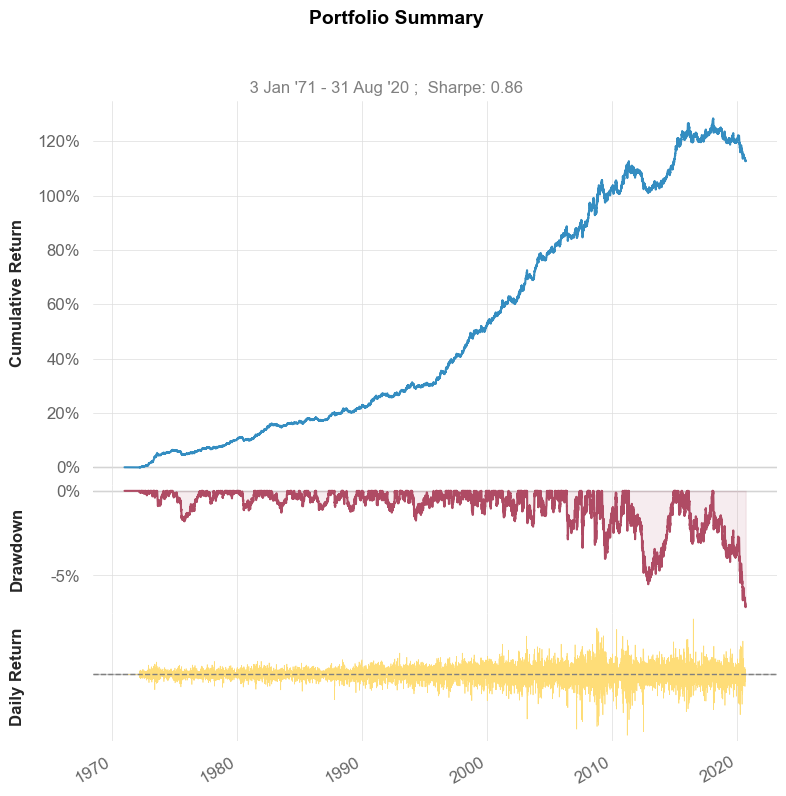

/Users/a13069q/github/cs/.venv/lib/python3.9/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


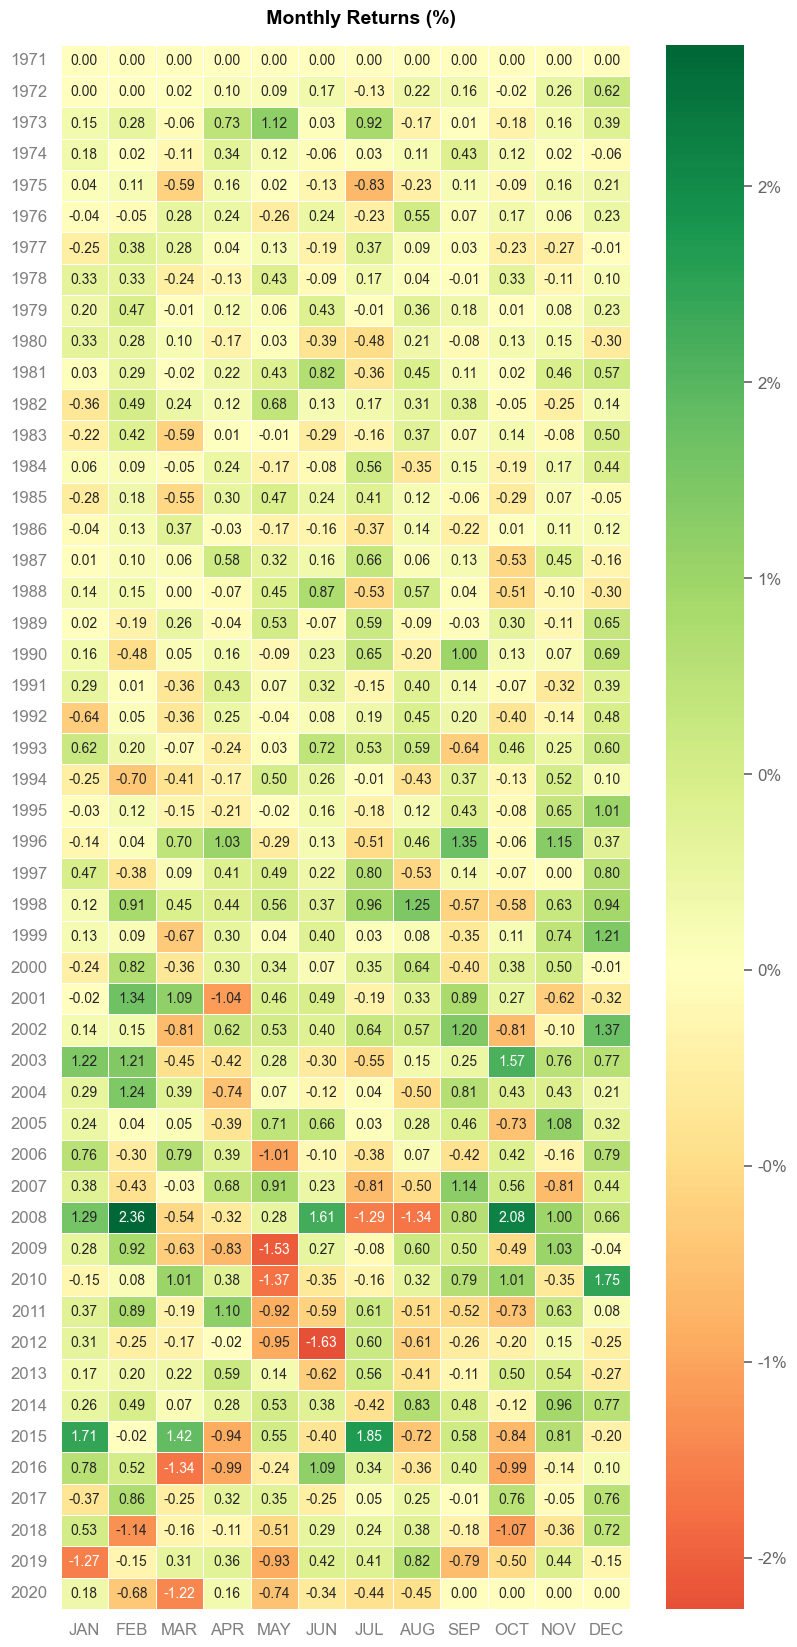

In [10]:
qs.reports.basic(portfolio.returns(init_capital=10000))

* This is a **univariate** trading system, we map the (real) price of an asset to its (cash)position
* Only 3 **free parameters** used here.
* Only 4 lines of code
* Scaling the bet-size by volatility has improved the situation.

Results do not look terrible but...
* No concept of risk integrated 

Often hedge funds outsource the risk management to some board or committee
and develop machinery for more systematic **parameter-hacking**.